In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import uproot
import astropy.io.fits as fits

#import glob
#import root_pandas as rpd
#from root_numpy import root2array, list_trees

### Lectura del archivo CSV

In [3]:
input_folder = '.\\datos_csv\\'
filename = '1.root.csv'

catalog = pd.read_csv(input_folder+filename, index_col=0)
catalog.sort_index()

,muonCCD,centerX,centerY,sizeX,sizeY,angleX,angleY
eventNumber,,,,,,,
15,1,-3701.897342,22563.553721,207.537701,212.857987,-31.277569,-32.923240
15,3,-1673.652667,24618.216400,211.887135,209.084038,-33.780560,-32.080656
15,2,-2687.238579,23592.070934,207.771342,210.981421,-29.819193,-31.938544
32,3,-5365.993531,25418.054856,145.021769,425.482344,-26.807105,-27.265291
32,1,-6488.246795,20062.311898,152.315424,420.526559,-30.657469,-26.387688
...,...,...,...,...,...,...,...
4991,9,-8683.247195,-18387.126421,179.684820,156.744066,31.505340,-28.234785
4991,1,-2397.344412,-23736.562494,178.186558,157.196059,30.795220,-28.455709
4991,5,-5565.991545,-21097.556028,168.685102,159.348013,26.318451,-27.897887


### Cuenta el número de CCDs que atraviesa cada evento

In [4]:
ccd_count = pd.DataFrame({'count': catalog.index.value_counts().sort_index()})
ccd_count.index.name = 'eventNumber'
ccd_count

,count
eventNumber,
15,3
32,3
39,10
42,10
52,7
...,...
4944,2
4960,2
4967,5


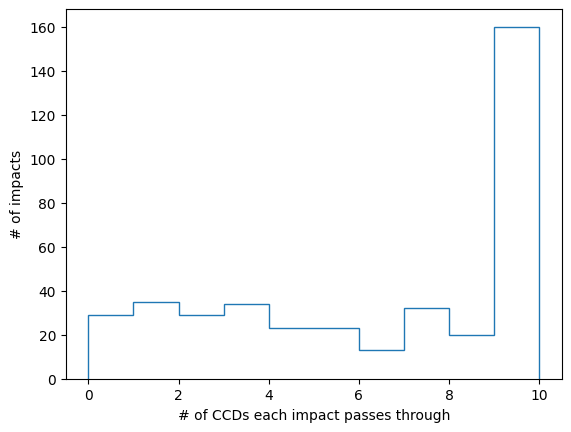

In [5]:
freq = ccd_count.value_counts().sort_index()
plt.stairs(np.round(freq))
plt.xlabel("# of CCDs each impact passes through")
plt.ylabel("# of impacts")
plt.show()

### Selecciona los eventos que atraviesan todos los CCDs

In [6]:
ccd_count_max = ccd_count[ccd_count['count'] == freq.index[-1][0]]
ccd_count_max

,count
eventNumber,
39,10
42,10
233,10
238,10
243,10
...,...
4827,10
4851,10
4907,10


In [7]:
catalog.loc[ccd_count_max.index]

,muonCCD,centerX,centerY,sizeX,sizeY,angleX,angleY
eventNumber,,,,,,,
39,1,7625.932138,-10653.649709,138.770036,138.782407,-24.422860,-23.320510
39,2,7907.719117,-10096.829321,137.563097,132.670038,-23.632030,-24.429845
39,3,8187.554781,-9543.303633,136.734463,129.966813,-24.290929,-23.450284
39,4,8472.469161,-9004.355944,141.670191,141.250461,-12.988327,-23.759245
39,5,8774.718800,-8459.616062,142.601479,141.429343,-13.757546,-24.246826
...,...,...,...,...,...,...,...
4991,6,-6353.323941,-20424.227436,173.316536,167.534615,30.998396,-31.343787
4991,7,-7132.460673,-19746.885120,176.672983,151.537488,32.440221,-23.767559
4991,8,-7912.235211,-19064.057599,178.424340,160.912649,31.078722,-25.961498


### Grafica las desviaciones de las trayectorias de la recta

In [8]:
event = catalog.loc[ccd_count_max.sample(1).index]
event.diff()

,muonCCD,centerX,centerY,sizeX,sizeY,angleX,angleY
eventNumber,,,,,,,
3888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3888,1.0,-430.511174,-1120.113373,19.657772,2.224234,-8.470017,-0.973536
3888,1.0,-429.498554,-1117.154243,-19.938945,-0.626290,-0.656512,1.889444
3888,1.0,-430.327474,-1119.536141,11.784893,-11.295926,0.071465,-6.771172
3888,1.0,-430.198159,-1119.389729,-7.444675,16.001930,7.075085,6.755119
3888,1.0,-430.686000,-1119.103338,2.131329,-2.939271,0.812089,0.300723
3888,1.0,-429.241128,-1116.679917,-18.034390,-20.991423,-2.265844,-8.007211
3888,1.0,-430.702849,-1121.211458,5.686217,11.017776,1.236572,2.819993
3888,1.0,-430.515756,-1118.616013,-8.448951,12.909601,1.742664,6.243728


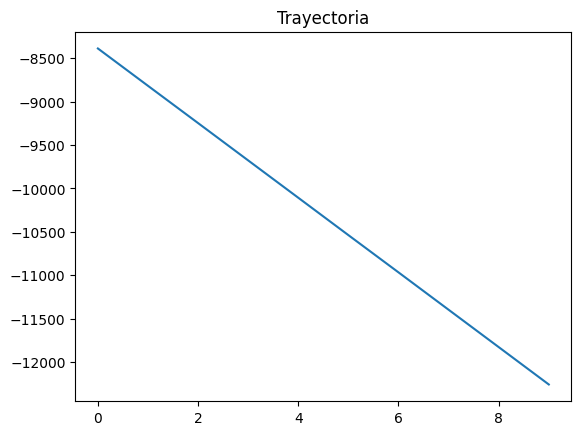

In [9]:
traj = event['centerX']
plt.title('Trayectoria')
plt.plot(traj.array)

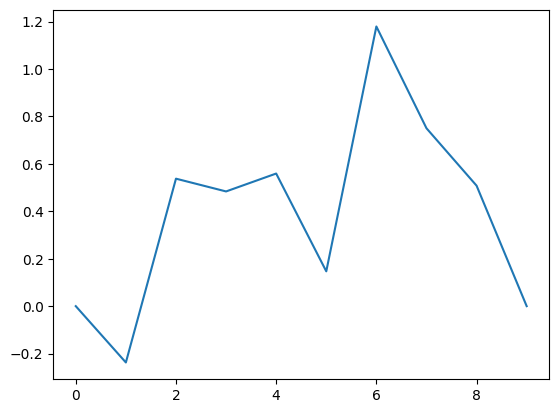

In [10]:
def zero_to_zero(array):
    array = array - array.iloc[0]
    delta = array.iloc[0] - array.iloc[-1]

    n = len(array) - 1
    for i in range(n + 1):
        array.iloc[i] += delta * i / n
    
    return array

plt.plot(zero_to_zero(traj).array)

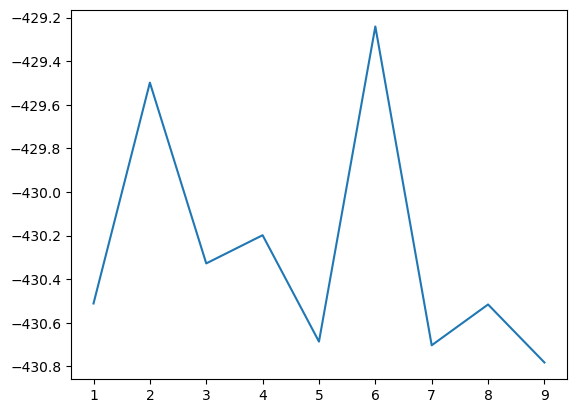

In [11]:
plt.plot(traj.diff().array)

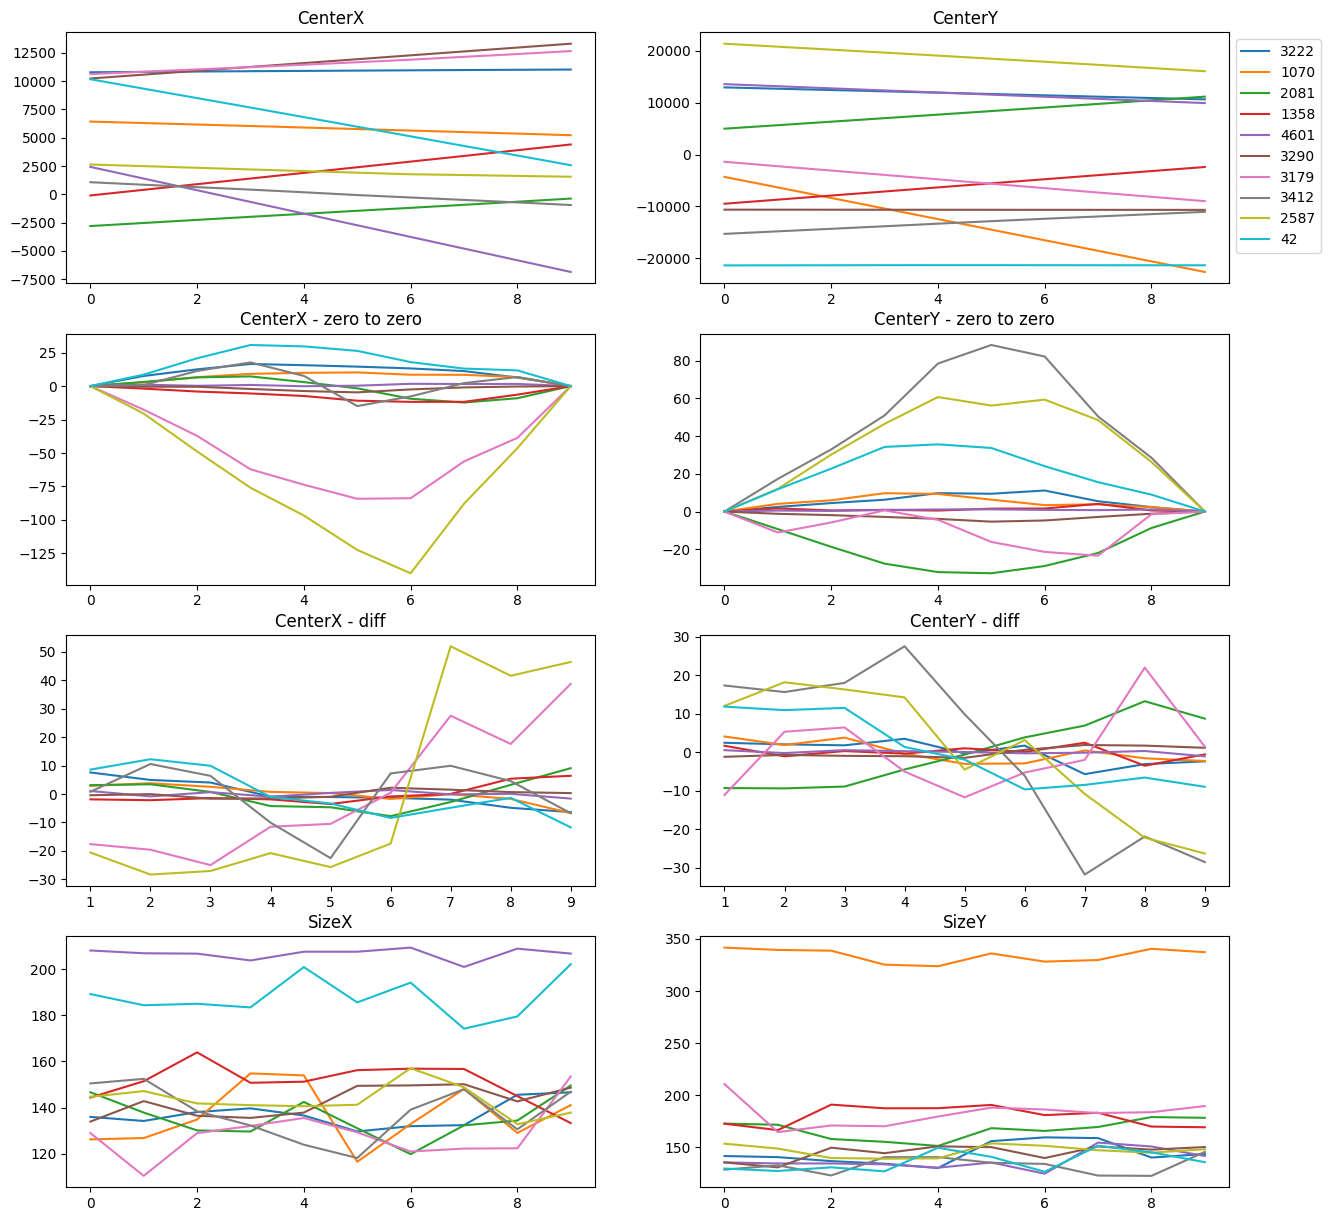

In [36]:
f, ax = plt.subplots(4, 2, figsize=(15, 15))

sample = ccd_count_max.sample(10)

for i in sample.index:
    
    traj = catalog.loc[i]['centerX']
    ax[0,0].plot(traj.array)
    traj = zero_to_zero(traj)
    ax[1,0].plot(traj.array)
    ax[2,0].plot(traj.diff().array)
    ax[3,0].plot(catalog.loc[i]['sizeX'].array)

    traj = catalog.loc[i]['centerY']
    ax[0,1].plot(traj.array, label=i)
    traj = zero_to_zero(traj)
    ax[1,1].plot(traj.array)
    ax[2,1].plot(traj.diff().array)
    ax[3,1].plot(catalog.loc[i]['sizeY'].array)

ax[0,1].legend(bbox_to_anchor=(1, 1))

ax[0,0].title.set_text("CenterX")
ax[1,0].title.set_text("CenterX - zero to zero")
ax[2,0].title.set_text("CenterX - diff")
ax[3,0].title.set_text("SizeX")

ax[0,1].title.set_text("CenterY")
ax[1,1].title.set_text("CenterY - zero to zero")
ax[2,1].title.set_text("CenterY - diff")
ax[3,1].title.set_text("SizeY")

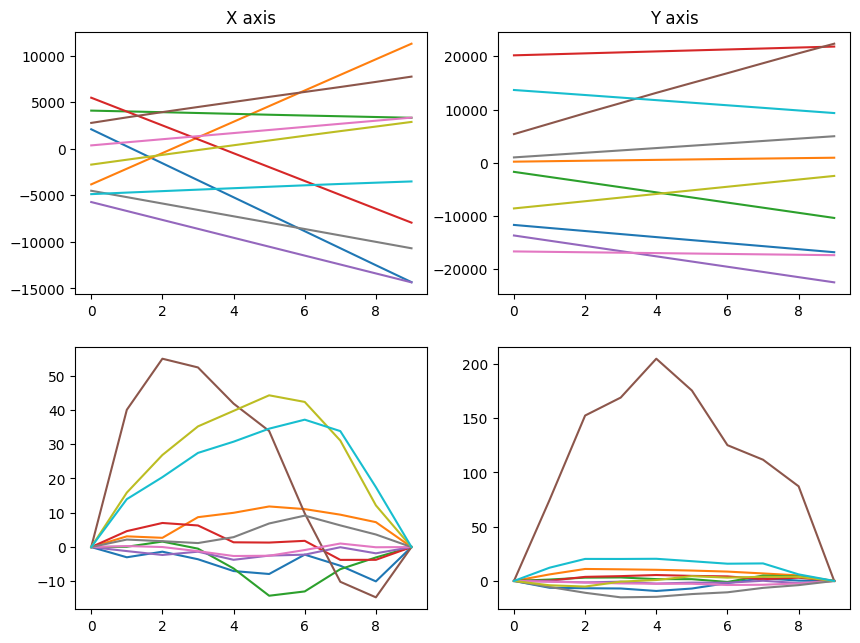

In [60]:
f, ax = plt.subplots(2, 2, figsize=(10, 7.5))

sample = ccd_count_max.sample(10)

for i in sample.index:
    
    traj = catalog.loc[i]['centerX']
    ax[0,0].plot(traj.array)
    traj = zero_to_zero(traj)
    ax[1,0].plot(traj.array)

    traj = catalog.loc[i]['centerY']
    ax[0,1].plot(traj.array, label=i)
    traj = zero_to_zero(traj)
    ax[1,1].plot(traj.array)

ax[0,0].title.set_text("X axis")

ax[0,1].title.set_text("Y axis")

In [35]:
catalog.loc[1482, 'sizeY'].mean()

312.9148511621723

,muonCCD,centerX,centerY,sizeX,sizeY,angleX,angleY
eventNumber,,,,,,,
1482,1,2781.325279,5399.910630,153.154802,333.940708,-28.023122,-30.778890
1482,2,3373.856384,7360.837754,144.267678,305.723046,-21.513824,-19.525251
1482,3,3941.257881,9324.980167,160.226399,325.896752,-34.431188,-30.019476
1482,4,4491.212206,11227.813452,165.206922,334.577928,-38.411915,-37.535514
1482,5,5033.166038,13149.919175,136.588323,310.180084,-25.901361,-28.059774
1482,6,5577.678353,15006.878807,155.511296,312.746798,-33.529765,-29.573412
1482,7,6106.154521,16842.759619,140.087168,298.924429,-29.508770,-30.215445
1482,8,6638.701459,18715.627576,142.588809,302.267773,-25.307806,-26.301754
1482,9,7186.664544,20577.397686,138.253348,306.826509,-23.738123,-28.421823


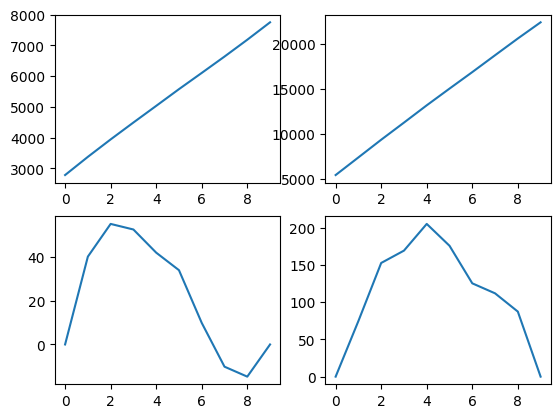

In [31]:


f, ax = plt.subplots(2, 2)

sample = [1482]

for i in sample:
    
    traj = catalog.loc[i]['centerX']
    ax[0,0].plot(traj.array)
    traj = zero_to_zero(traj)
    ax[1,0].plot(traj.array)

    traj = catalog.loc[i]['centerY']
    ax[0,1].plot(traj.array, label=i)
    traj = zero_to_zero(traj)
    ax[1,1].plot(traj.array)

catalog.loc[1482]

### Determina los parámetros del modelo

In [ ]:
sizeX = []
sizeY = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    sizeX.extend(df['sizeX'].diff()[1:])
    sizeY.extend(df['sizeY'].diff()[1:])

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].hist(sizeX, bins=np.arange(min(sizeX), max(sizeX)+1))
ax[1].hist(sizeY, bins=np.arange(min(sizeY), max(sizeY)+1))
ax[0].set_title(f'[{min(sizeX)}, {max(sizeX)}]')
ax[1].set_title(f'[{min(sizeY)}, {max(sizeY)}]')
plt.show()

In [ ]:
angleX = []
angleY = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    angleX.extend(df['angleX'].diff()[1:])
    angleY.extend(df['angleY'].diff()[1:])

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].hist(angleX, bins=np.arange(min(angleX), max(angleX)+1))
ax[1].hist(angleY, bins=np.arange(min(angleY), max(angleY)+1))
ax[0].set_title(f'[{min(angleX)}, {max(angleX)}]')
ax[1].set_title(f'[{min(angleY)}, {max(angleY)}]')
plt.show()

In [ ]:
offset = 0

thresholdX = offset
thresholdY = offset

distanceX = []
avg_sizeX = []

distanceY = []
avg_sizeY = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    avg_sizeX.append(df['angleX'].mean())
    distanceX.append(df.diff()['centerX'].mean())
    
    avg_sizeY.append(df['angleY'].mean())
    distanceY.append(df.diff()['centerY'].mean())

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(avg_sizeX, distanceX)
ax[1].scatter(avg_sizeY, distanceY)
ax[0].set_title('X axis')
ax[1].set_title('Y axis')
for i in range(2):
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Distance')

ax[0].axhline(thresholdX, color='red')
ax[1].axhline(thresholdY, color='red')
plt.show()

In [ ]:
offset = 0

thresholdX = offset
thresholdY = offset

distanceX = []
avg_sizeX = []

distanceY = []
avg_sizeY = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    avg_sizeX.append(df['sizeX'].mean())
    distanceX.append(df.diff()['centerX'].mean())
    
    avg_sizeY.append(df['sizeY'].mean())
    distanceY.append(df.diff()['centerY'].mean())

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(avg_sizeX, distanceX)
ax[1].scatter(avg_sizeY, distanceY)
ax[0].set_title('X axis')
ax[1].set_title('Y axis')
for i in range(2):
    ax[i].set_xlabel('Size')
    ax[i].set_ylabel('Distance')

ax[0].axhline(thresholdX, color='red')
ax[1].axhline(thresholdY, color='red')
plt.show()

In [ ]:
distanceX1 = []
avg_sizeX1 = []

distanceX2 = []
avg_sizeX2 = []

distanceY1 = []
avg_sizeY1 = []

distanceY2 = []
avg_sizeY2 = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    sizeX = df['sizeX'].mean()
    sizeY = df['sizeY'].mean()
    
    distX = df.diff()['centerX'].mean()
    distY = df.diff()['centerY'].mean()
    
    if distX >= thresholdX:
        avg_sizeX1.append(sizeX)
        distanceX1.append(distX-thresholdX)
    else:
        avg_sizeX2.append(sizeX)
        distanceX2.append(thresholdX-distX)
    
    if distY >= thresholdY:
        avg_sizeY1.append(sizeY)
        distanceY1.append(distY-thresholdY)
    else:
        avg_sizeY2.append(sizeY)
        distanceY2.append(thresholdY-distY)

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(avg_sizeX1, distanceX1)
ax[1].scatter(avg_sizeY1, distanceY1)
ax[0].scatter(avg_sizeX2, distanceX2)
ax[1].scatter(avg_sizeY2, distanceY2)
ax[0].set_title('X axis')
ax[1].set_title('Y axis')
for i in range(2):
    ax[i].set_xlabel('Size')
    ax[i].set_ylabel('Distance')

In [ ]:
angle_threshold = 25

ccd_1 = catalog[catalog['muonCCD'] == 1].drop('muonCCD', axis=1)
ccd_2 = catalog[catalog['muonCCD'] == 2].drop('muonCCD', axis=1)
ccd_1_2 = ccd_1.join(ccd_2, how='inner', lsuffix='_CCD1', rsuffix='_CCD2')
ccd_1_2['distX'] = ccd_1_2['centerX_CCD2'] - ccd_1_2['centerX_CCD1']
ccd_1_2['distY'] = ccd_1_2['centerY_CCD2'] - ccd_1_2['centerY_CCD1']

ccd_1_2

### Examina la correlación entre el tamaño y la trayectoria

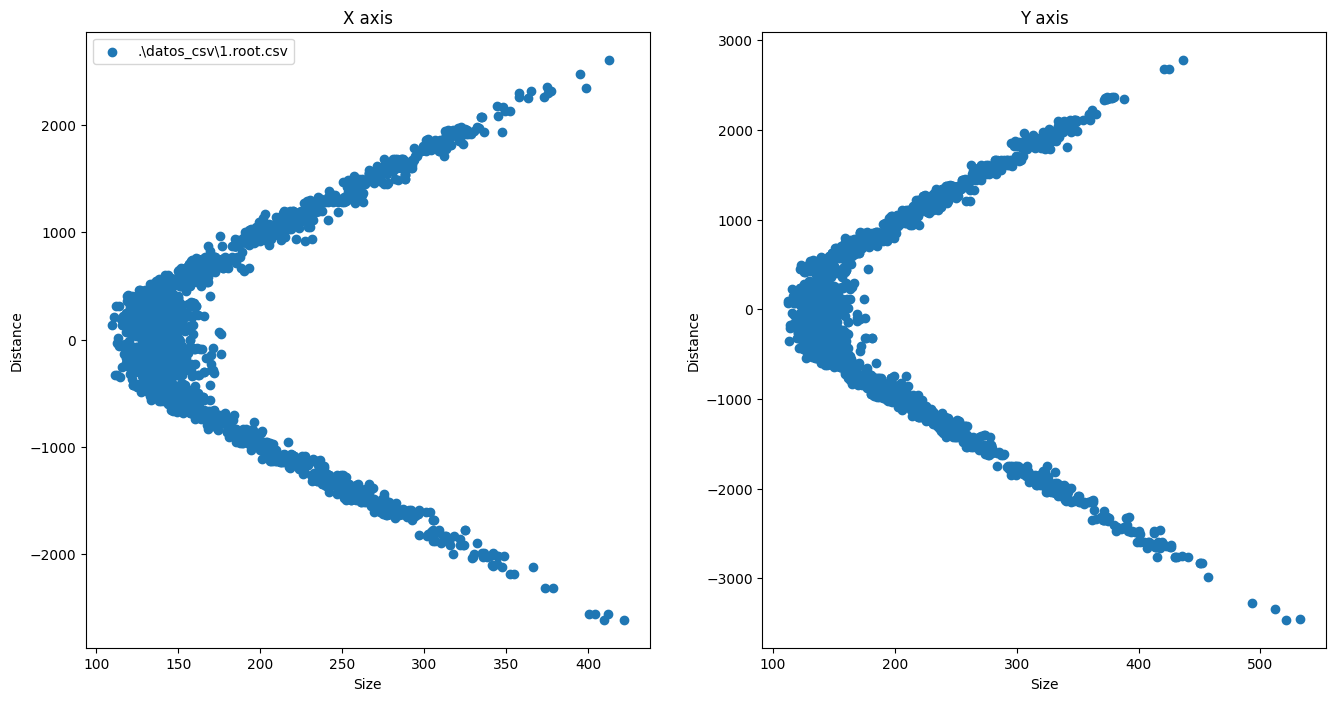

In [12]:
import glob

f, ax = plt.subplots(1, 2, figsize=(16,8))

for file in glob.glob(input_folder+'*.csv'):
    catalog = pd.read_csv(file, index_col=0)
    
    sizeX = []
    distX = []

    sizeY = []
    distY = []
    
    for i in np.unique(catalog.index):
        df = catalog[catalog.index == i]
    
        sizeX.extend(list(df['sizeX'])[:-1])
        distX.extend(list(df['centerX'].diff())[1:])

        sizeY.extend(list(df['sizeY'])[:-1])
        distY.extend(list(df['centerY'].diff())[1:])
    
    ax[0].scatter(sizeX, distX, label=file)
    ax[1].scatter(sizeY, distY)

ax[0].legend()
ax[0].set_title('X axis')
ax[1].set_title('Y axis')
for i in range(2):
    ax[i].set_xlabel('Size')
    ax[i].set_ylabel('Distance')

### Analiza un método alternativo de regresión

In [13]:
catalog = pd.read_csv('./datos_csv/1.root.csv', index_col=0)
catalog.sort_index()
ccd_count = pd.DataFrame({'count': catalog.index.value_counts().sort_index()})
ccd_count.index.name = 'eventNumber'
freq = ccd_count.value_counts().sort_index()
ccd_count_max = ccd_count[ccd_count['count'] == freq.index[-1][0]]

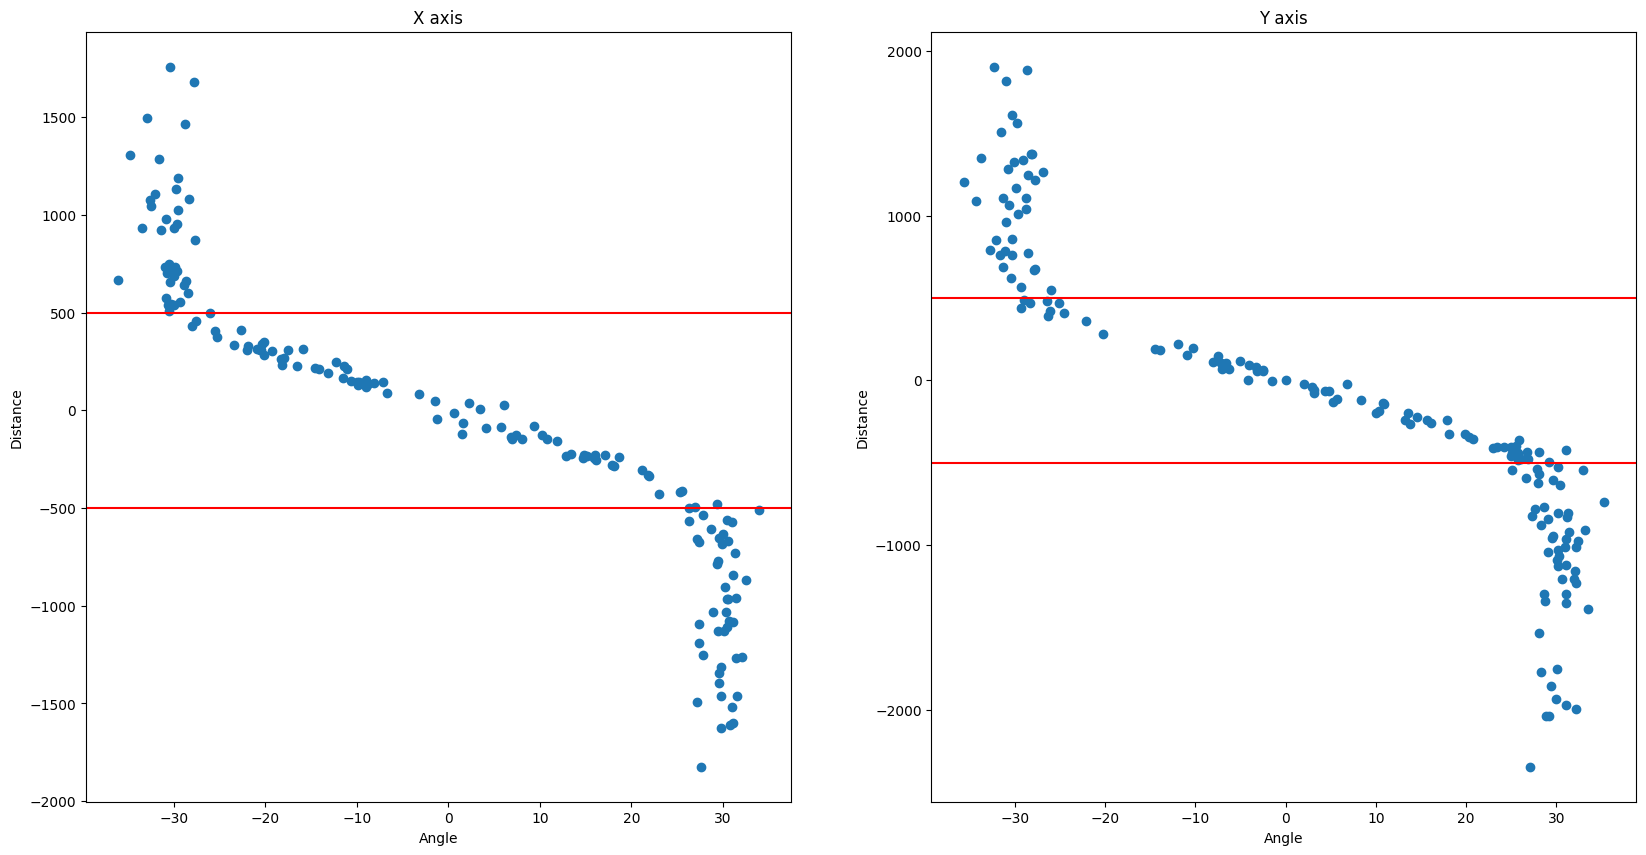

In [14]:
distanceX = []
avg_sizeX = []

distanceY = []
avg_sizeY = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    avg_sizeX.append(df['angleX'].mean())
    distanceX.append(df.diff()['centerX'].mean())
    
    avg_sizeY.append(df['angleY'].mean())
    distanceY.append(df.diff()['centerY'].mean())

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(avg_sizeX, distanceX)
ax[1].scatter(avg_sizeY, distanceY)
ax[0].set_title('X axis')
ax[1].set_title('Y axis')
for i in range(2):
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Distance')

ax[0].axhline(500, color='red')
ax[1].axhline(500, color='red')
ax[0].axhline(-500, color='red')
ax[1].axhline(-500, color='red')
plt.show()

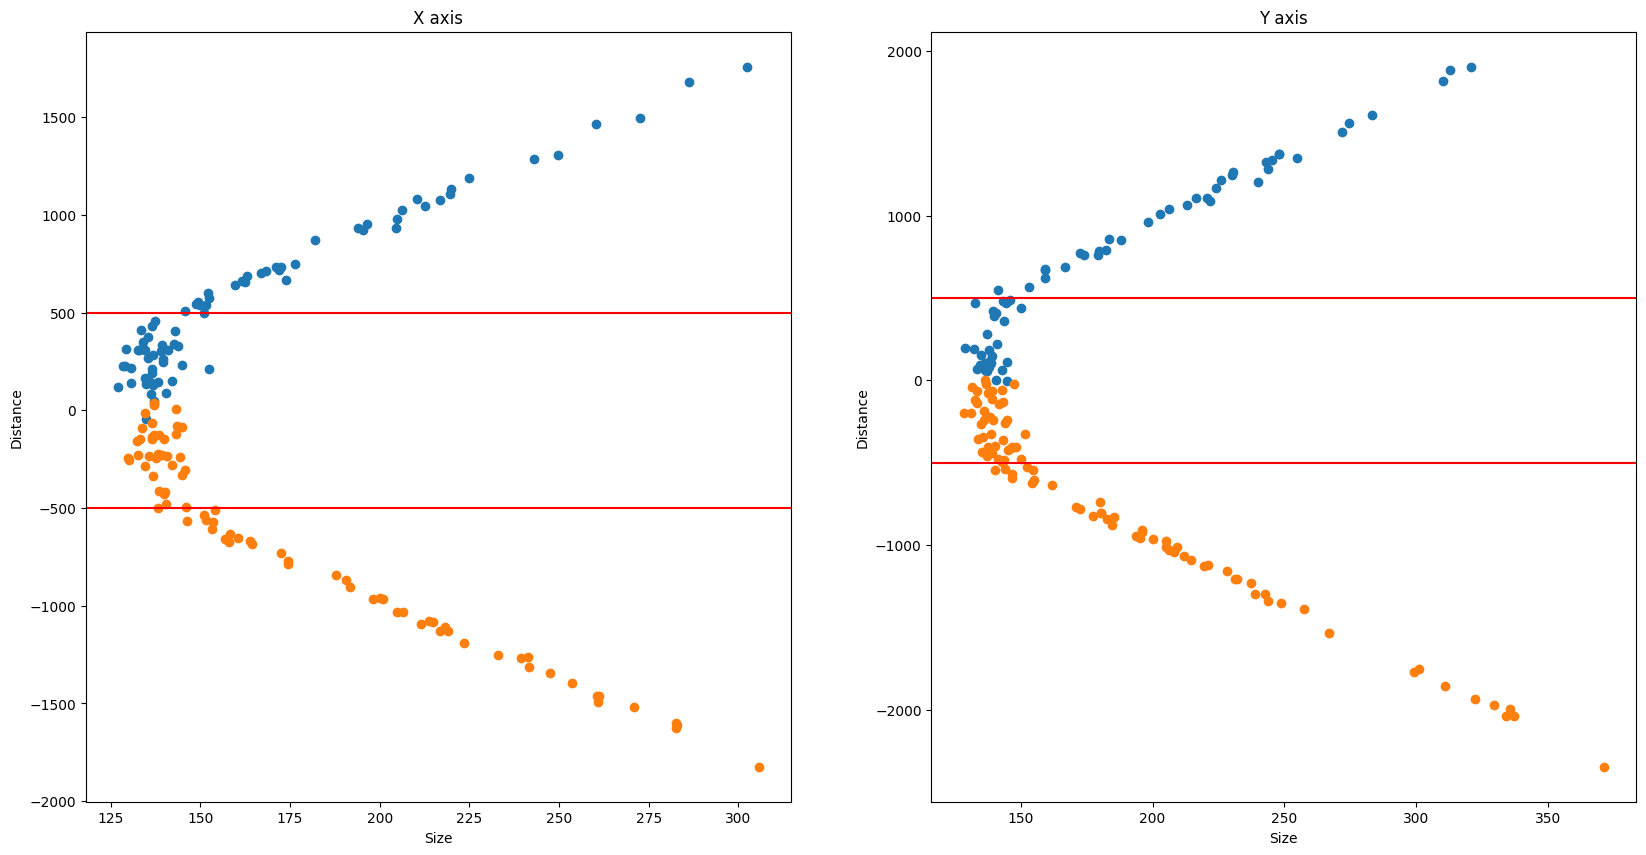

In [15]:
distanceX1 = []
distanceX2 = []
avg_sizeX1 = []
avg_sizeX2 = []

distanceY1 = []
distanceY2 = []
avg_sizeY1 = []
avg_sizeY2 = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    if df['angleX'].mean() < 0:
        avg_sizeX1.append(df['sizeX'].mean())
        distanceX1.append(df.diff()['centerX'].mean())
    else:
        avg_sizeX2.append(df['sizeX'].mean())
        distanceX2.append(df.diff()['centerX'].mean())
    
    if df['angleY'].mean() < 0:
        avg_sizeY1.append(df['sizeY'].mean())
        distanceY1.append(df.diff()['centerY'].mean())
    else:
        avg_sizeY2.append(df['sizeY'].mean())
        distanceY2.append(df.diff()['centerY'].mean())

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(avg_sizeX1, distanceX1)
ax[0].scatter(avg_sizeX2, distanceX2)
ax[1].scatter(avg_sizeY1, distanceY1)
ax[1].scatter(avg_sizeY2, distanceY2)
ax[0].set_title('X axis')
ax[1].set_title('Y axis')
for i in range(2):
    ax[i].set_xlabel('Size')
    ax[i].set_ylabel('Distance')

ax[0].axhline(500, color='red')
ax[1].axhline(500, color='red')
ax[0].axhline(-500, color='red')
ax[1].axhline(-500, color='red')
plt.show()

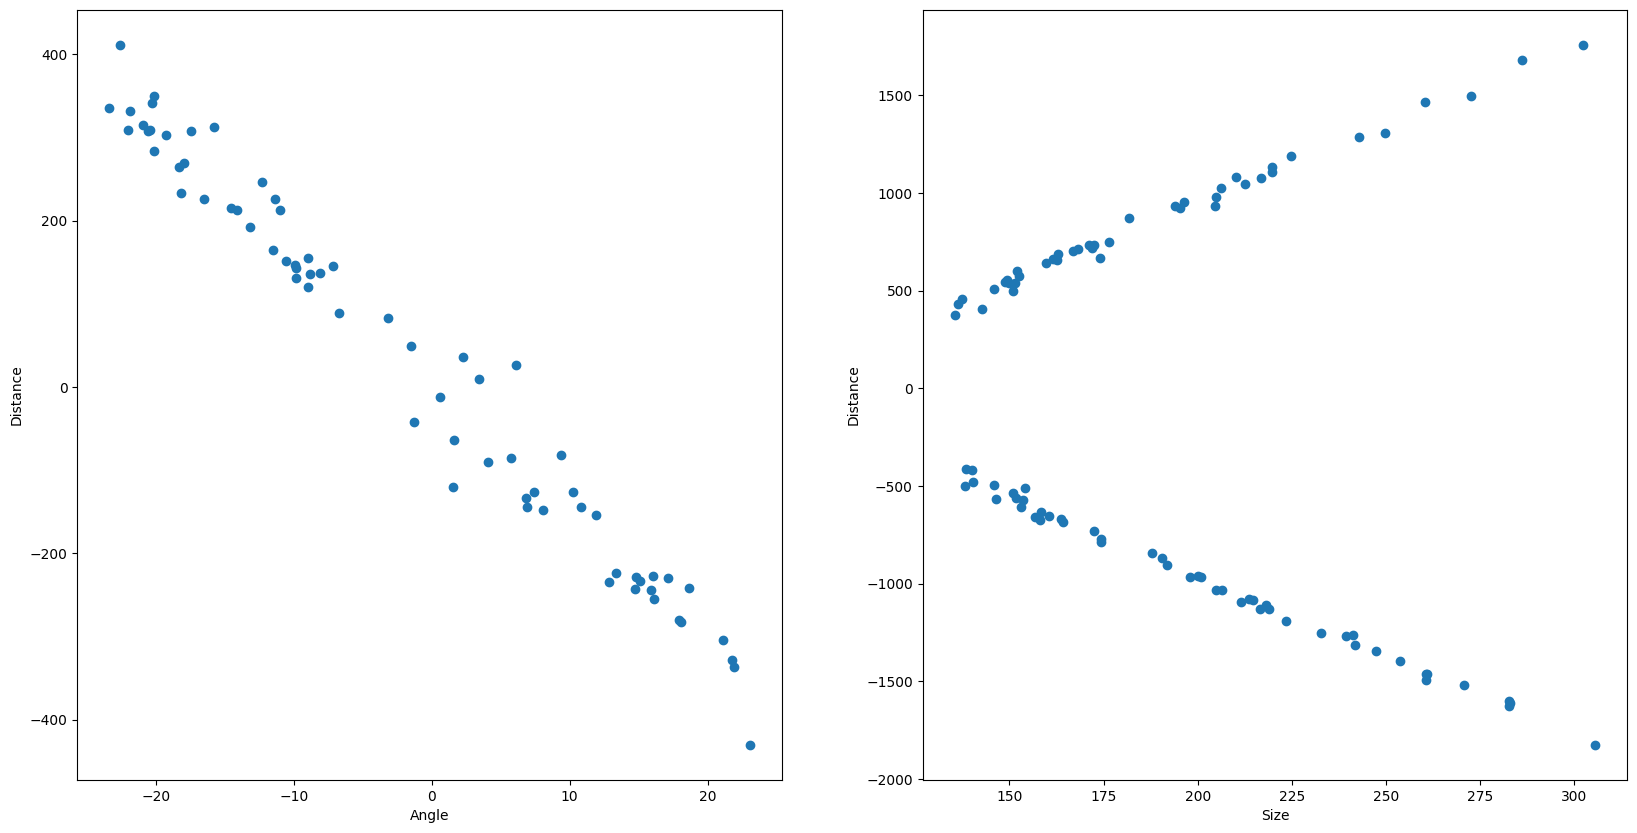

In [16]:
left_X = []
left_Y = []

right_X = []
right_Y = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    size = df['sizeX'].mean()
    angle = df['angleX'].mean()
    distance = df.diff()['centerX'].mean()
    
    if -25 < angle and angle < 25:
        left_X.append(angle)
        left_Y.append(distance)
    
    else:
        right_X.append(size)
        right_Y.append(distance)

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(left_X, left_Y)
ax[1].scatter(right_X, right_Y)

ax[0].set_xlabel('Angle')
ax[1].set_xlabel('Size')

for i in range(2):
    ax[i].set_ylabel('Distance')

plt.show()

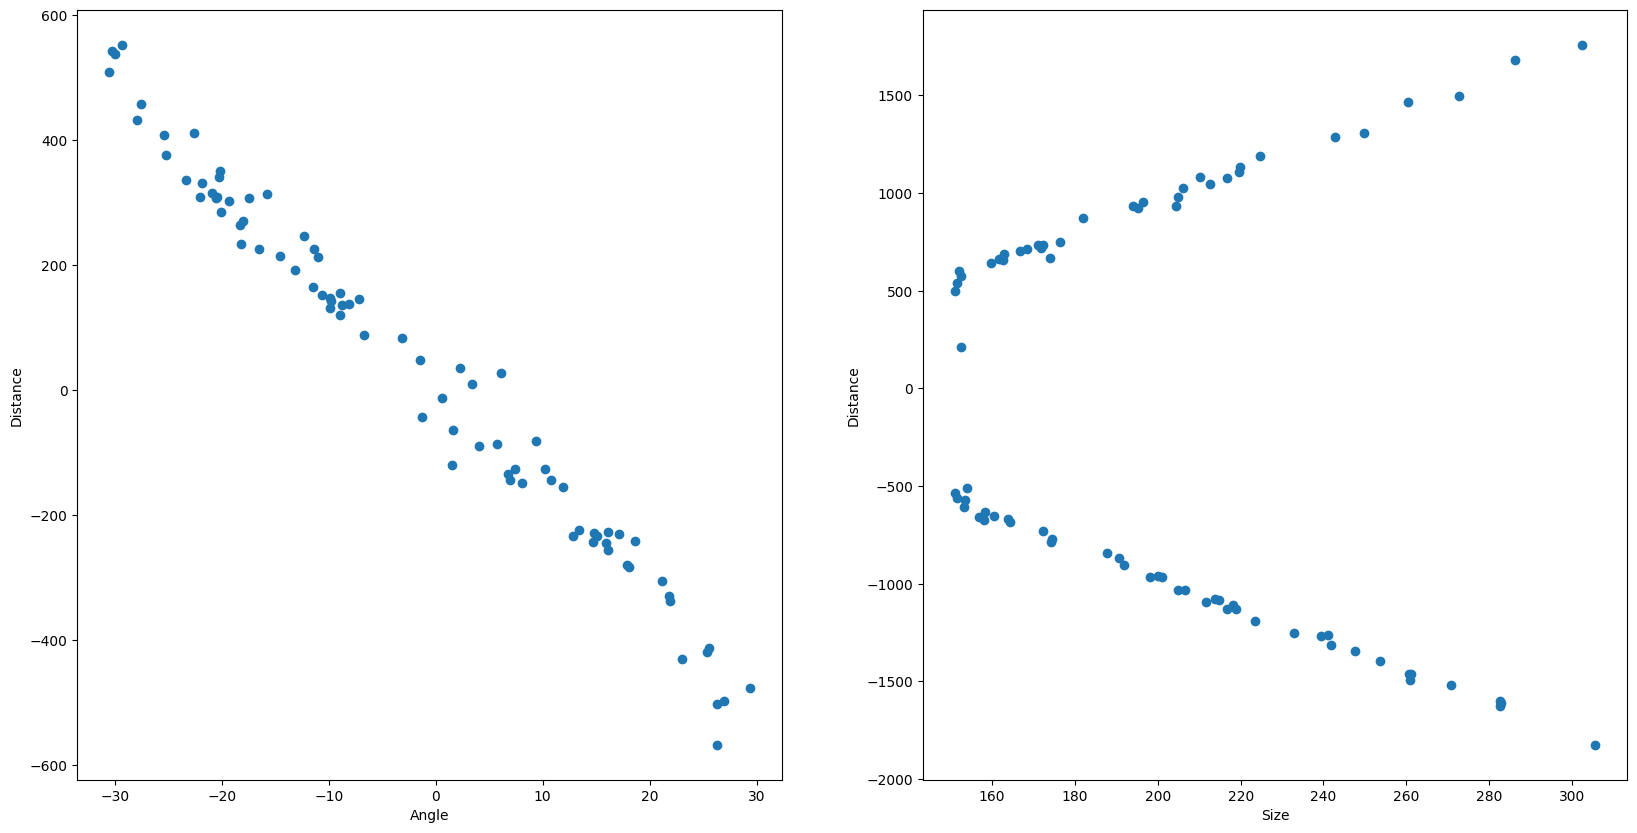

In [17]:
left_X = []
left_Y = []

right_X = []
right_Y = []

for i in np.unique(catalog.loc[ccd_count_max.index].index):
    df = catalog[catalog.index == i]
    
    size = df['sizeX'].mean()
    angle = df['angleX'].mean()
    distance = df.diff()['centerX'].mean()
    
    if size > 150:
        right_X.append(size)
        right_Y.append(distance)
    
    else:
        left_X.append(angle)
        left_Y.append(distance)

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(left_X, left_Y)
ax[1].scatter(right_X, right_Y)

ax[0].set_xlabel('Angle')
ax[1].set_xlabel('Size')

for i in range(2):
    ax[i].set_ylabel('Distance')

plt.show()